# DIPLOMATURA EN CIENCIA DE DATOS, APRENDIZAJE AUTOMÁTICO Y SUS APLICACIONES

## Analisis y visuzlización de datos 

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import time
import datetime as dt
from IPython.display import HTML, display
import math

seaborn.set_context('talk')



In [2]:
url= 'https://raw.githubusercontent.com/laraccano84/Mentoria_mumuki/main/DiploDatos_Mentoria_Mumiki_G2/DataSet_Mumuki_Transformed.csv'
df_mumuki = pd.read_csv(url)

In [3]:
df_mumuki[:3]

,Unnamed: 0,exercise_name,expectation_results,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,...,Month,Week,DayNroWeek,DayNameWeek,Time,Hora,Minute,lesson_number,exercise_index_per_lesson,id_exercise
0,0,"Funciones, declaración / No tan distintos",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\r\n return numero / 2,2019-08-30 13:17:17.700,passed,...,8,35,4,Friday,13:17:17.700000,13,17,1,1,1
1,1,"Funciones, declaración / No tan distintos",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1,77,def mitad(numero):\r\n return numero / 2,2019-09-04 01:29:22.351,passed,...,9,36,2,Wednesday,01:29:22.351000,1,29,1,1,1
2,2,"Funciones, declaración / No tan distintos",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2,78,def Mitas(numero):\r\n return 2 / numero\r\n,2019-09-04 02:53:01.099,failed,...,9,36,2,Wednesday,02:53:01.099000,2,53,1,1,1


# Frecuencia de acceso a la app

## Cantidad envios por día

**A continuación se agrupa por periodo, donde tenemos la cantidad de envios, la cantidad de ejercicios, la cantidad de estudiante.**

In [4]:
df_Periodo=df_mumuki.groupby(['Year','Month','Periodo'], as_index=False).agg({'id_exercise':'count','exercise_name': (lambda x: len(set(x))),'student_uid': (lambda x: len(set(x)))}).rename(columns={'id_exercise':'cant_envios','exercise_name':'cant_ejercicios_unicos','student_uid':'cant_student'})

In [5]:
df_Periodo

,Year,Month,Periodo,cant_envios,cant_ejercicios_unicos,cant_student
0,2019,8,2019-08,2,2,1
1,2019,9,2019-09,4746,40,54
2,2019,10,2019-10,2263,40,45
3,2019,11,2019-11,580,40,11
4,2019,12,2019-12,23,7,1
5,2020,5,2020-05,15732,40,98
6,2020,6,2020-06,3507,40,62
7,2020,7,2020-07,1054,40,34
8,2020,8,2020-08,494,40,5
9,2020,9,2020-09,15305,40,94


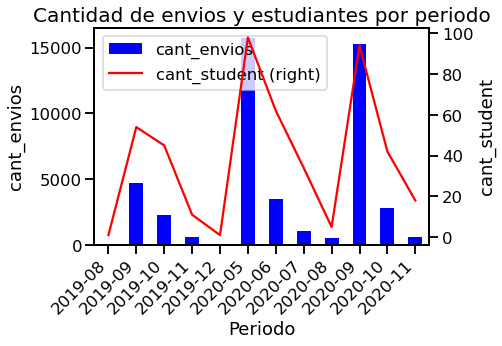

In [6]:
xlabels = df_Periodo['Periodo']

ax=df_Periodo.plot(kind='bar', x='Periodo', y='cant_envios', color='b')
ax2=df_Periodo.plot(kind='line', x='Periodo', y='cant_student', secondary_y=True,color='Red', ax=ax)

ax.set_ylabel('cant_envios')
ax2.set_ylabel('cant_student')

ax.set_xlabel('Periodo')
ax.set_title('Cantidad de envios y estudiantes por periodo', fontsize=20)
ax.set_xticklabels(xlabels, rotation=45, ha='right')
plt.show()

**A continuacion se agrupa por estudiante, se contabiliza la cantidad de envios, de ejericios y de dias por estudiante.** 

In [7]:
df_mumuki['created_at'] = df_mumuki['submission_created_at']
df_student = df_mumuki.groupby(['student_uid'], as_index=True).agg({'id_exercise':'count','exercise_name': (lambda x: len(set(x))),'submission_created_at':'min','created_at':'max'}).rename(columns={'id_exercise':'cant_envios','exercise_name':'cant_ejercicios_unicos','submission_created_at':'f_primer_envio','created_at':'f_ultimo_envio'})
df_student['tiempo_invertido'] = pd.to_datetime(df_student['f_ultimo_envio'])-pd.to_datetime(df_student['f_primer_envio'])
df_student['tiempo_invertido_horas'] = round((pd.to_datetime(df_student['f_ultimo_envio'])-pd.to_datetime(df_student['f_primer_envio'])).dt.total_seconds() / 3600.0,2) 
df_student['tiempo_invertido_dias'] = round(df_student['tiempo_invertido_horas']/24,4)

df_student.sort_values(by=['tiempo_invertido_dias'],ascending = False)

,cant_envios,cant_ejercicios_unicos,f_primer_envio,f_ultimo_envio,tiempo_invertido,tiempo_invertido_horas,tiempo_invertido_dias
student_uid,,,,,,,
97,101,22,2019-09-25 12:16:19.153,2020-09-25 15:44:32.619,366 days 03:28:13.466000,8787.47,366.1446
250,268,40,2020-07-15 00:20:53.522,2020-10-15 14:36:40.650,92 days 14:15:47.128000,2222.26,92.5942
260,222,40,2020-09-07 12:54:18.781,2020-11-23 20:15:28.657,77 days 07:21:09.876000,1855.35,77.3062
355,15,8,2020-05-26 14:11:01.786,2020-08-03 19:40:07.416,69 days 05:29:05.630000,1661.48,69.2283
319,196,40,2020-09-14 20:02:24.818,2020-11-21 15:17:26.661,67 days 19:15:01.843000,1627.25,67.8021
...,...,...,...,...,...,...,...
358,6,1,2020-05-16 18:49:13.480,2020-05-16 18:50:49.407,0 days 00:01:35.927000,0.03,0.0012
362,3,1,2019-10-17 14:35:27.705,2019-10-17 14:36:54.224,0 days 00:01:26.519000,0.02,0.0008
142,1,1,2019-10-28 15:42:26.328,2019-10-28 15:42:26.328,0 days 00:00:00,0.00,0.0000


In [8]:
df_student.describe()

,cant_envios,cant_ejercicios_unicos,tiempo_invertido,tiempo_invertido_horas,tiempo_invertido_dias
count,285.000000,285.000000,285,285.000000,285.000000
mean,165.301754,31.161404,22 days 09:42:24.363063158,537.706421,22.404434
std,108.391765,13.409133,28 days 09:31:13.991809051,681.520388,28.396683
min,1.000000,1.000000,0 days 00:00:00,0.000000,0.000000
25%,86.000000,22.000000,6 days 23:17:35.349000,167.290000,6.970400
50%,149.000000,40.000000,14 days 04:51:26.400000,340.860000,14.202500
75%,223.000000,40.000000,34 days 23:46:56.855000,839.780000,34.990800
max,660.000000,40.000000,366 days 03:28:13.466000,8787.470000,366.144600


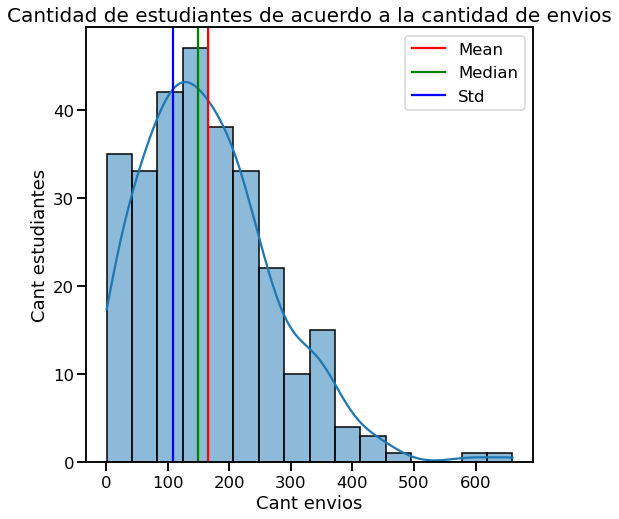

In [9]:
mean_tiem = df_student['cant_envios'].mean()
median_tiem = df_student['cant_envios'].median()
std_tiem = df_student['cant_envios'].std()

plt.figure(figsize=(8, 8))
ax=seaborn.histplot(df_student['cant_envios'] , kde=True)

ax.set_xlabel('Cant envios')
ax.set_ylabel('Cant estudiantes')
ax.set_title('Cantidad de estudiantes de acuerdo a la cantidad de envios', fontsize=20)
ax.axvline(mean_tiem, color='r', linestyle='-',label='Mean')
ax.axvline(median_tiem, color='g', linestyle='-',label='Median')
ax.axvline(std_tiem, color='b', linestyle='-',label='Std')
plt.legend(loc='upper right')

plt.show()

In [10]:
print(f"Podemos observar la cantidad de estudiantes distribuido de acuerdo a la cantidad de envios, donde se ve que la Media es de: {mean_tiem} la Mediana de: {median_tiem} y la Estandar es de: {std_tiem} envios")

Podemos observar la cantidad de estudiantes distribuido de acuerdo a la cantidad de envios, donde se ve que la Media es de: 165.3017543859649 la Mediana de: 149.0 y la Estandar es de: 108.39176546608581 envios


**Distribucion de tiempo invertido por estudiante**

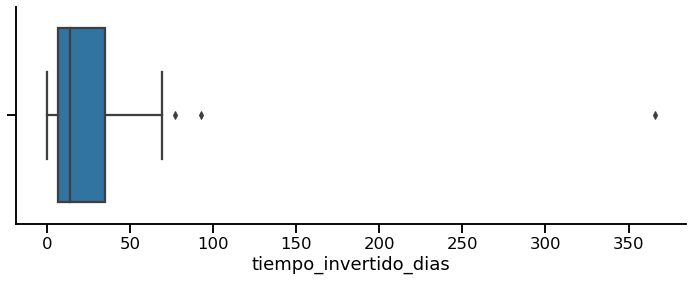

In [11]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_student['tiempo_invertido_dias'])
seaborn.despine()

Aqui tenemos outlier que nos desvirtuan ya que es un solo caso, por lo que se va a eliminar los registro donde el tiempo invertido en dias es mayor a 100.

In [12]:
df_student = df_student[df_student['tiempo_invertido_dias']<=100]

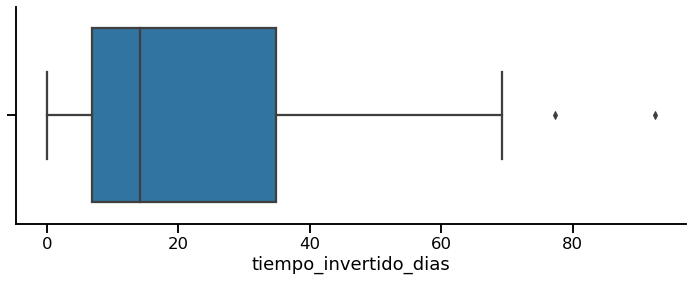

In [13]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_student['tiempo_invertido_dias'])
seaborn.despine()

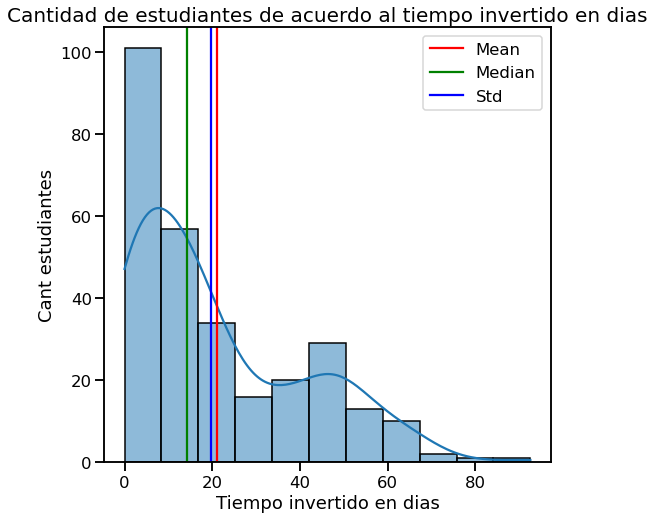

In [14]:
mean_tiem_t = df_student['tiempo_invertido_dias'].mean()
median_tiem_t = df_student['tiempo_invertido_dias'].median()
std_tiem_t = df_student['tiempo_invertido_dias'].std()

plt.figure(figsize=(8, 8))
ax=seaborn.histplot(df_student['tiempo_invertido_dias'] , kde=True)

ax.set_xlabel('Tiempo invertido en dias')
ax.set_ylabel('Cant estudiantes')
ax.set_title('Cantidad de estudiantes de acuerdo al tiempo invertido en dias', fontsize=20)
ax.axvline(mean_tiem_t, color='r', linestyle='-',label='Mean')
ax.axvline(median_tiem_t, color='g', linestyle='-',label='Median')
ax.axvline(std_tiem_t, color='b', linestyle='-',label='Std')
plt.legend(loc='upper right')

plt.show()

In [15]:
print(f"Podemos observar la mayoria de los estudiantes resuelven los ejercicios en los primeros dias, de acuerdo al total se determina que la Media es de: {mean_tiem_t} la Mediana de: {median_tiem_t} y la Estandar es de: {std_tiem_t} de tiempo de envios en dias")

Podemos observar la mayoria de los estudiantes resuelven los ejercicios en los primeros dias, de acuerdo al total se determina que la Media es de: 21.194081338028177 la Mediana de: 14.18895 y la Estandar es de: 19.754337884847764 de tiempo de envios en dias


In [16]:
df_student['avg_tiempo'] = df_student['tiempo_invertido_horas']/df_student['cant_envios']
df_student

,cant_envios,cant_ejercicios_unicos,f_primer_envio,f_ultimo_envio,tiempo_invertido,tiempo_invertido_horas,tiempo_invertido_dias,avg_tiempo
student_uid,,,,,,,,
75,1,1,2020-08-07 19:37:14.806,2020-08-07 19:37:14.806,0 days 00:00:00,0.00,0.0000,0.000000
76,89,36,2019-08-30 13:17:17.700,2019-10-16 23:09:51.808,47 days 09:52:34.108000,1137.88,47.4117,12.785169
77,186,40,2019-09-04 01:29:22.351,2019-09-23 13:26:40.846,19 days 11:57:18.495000,467.96,19.4983,2.515914
78,84,9,2019-09-04 02:53:01.099,2019-09-28 20:24:59.484,24 days 17:31:58.385000,593.53,24.7304,7.065833
79,95,22,2019-09-05 14:24:31.797,2019-10-23 13:20:51.240,47 days 22:56:19.443000,1150.94,47.9558,12.115158
...,...,...,...,...,...,...,...,...
358,6,1,2020-05-16 18:49:13.480,2020-05-16 18:50:49.407,0 days 00:01:35.927000,0.03,0.0012,0.005000
359,38,16,2020-05-14 22:42:31.975,2020-05-29 02:25:47.078,14 days 03:43:15.103000,339.72,14.1550,8.940000
361,1,1,2019-10-17 12:52:42.552,2019-10-17 12:52:42.552,0 days 00:00:00,0.00,0.0000,0.000000


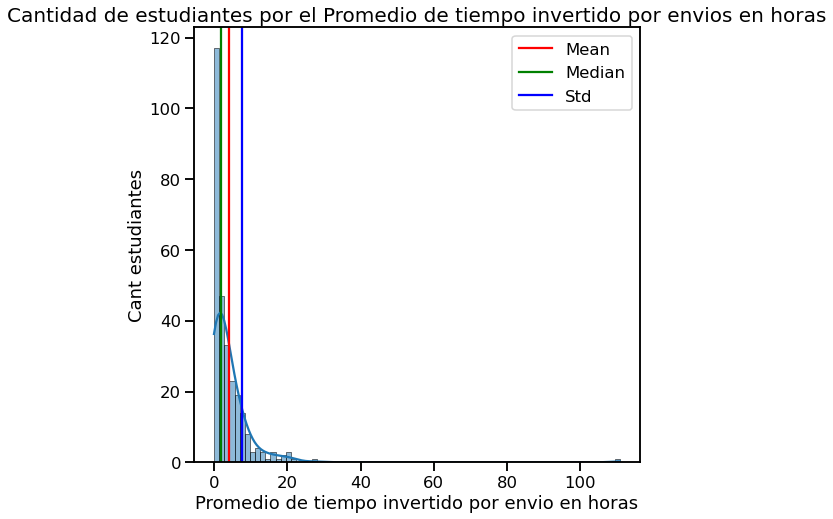

In [17]:
mean_tiem_h = df_student['avg_tiempo'].mean()
median_tiem_h = df_student['avg_tiempo'].median()
std_tiem_h = df_student['avg_tiempo'].std()

plt.figure(figsize=(8, 8))
ax=seaborn.histplot(df_student['avg_tiempo'] , kde=True)

ax.set_xlabel('Promedio de tiempo invertido por envio en horas')
ax.set_ylabel('Cant estudiantes')
ax.set_title('Cantidad de estudiantes por el Promedio de tiempo invertido por envios en horas', fontsize=20)
ax.axvline(mean_tiem_h, color='r', linestyle='-',label='Mean')
ax.axvline(median_tiem_h, color='g', linestyle='-',label='Median')
ax.axvline(std_tiem_h, color='b', linestyle='-',label='Std')
plt.legend(loc='upper right')

plt.show()

In [18]:
print(f"Podemos observar que la mayoria de los estudiantes en promedio han en emnos de 1 hora los ejercicio, de acuerdo al total se determina que la Media es de: {mean_tiem_h} la Mediana de: {median_tiem_h} y la Estandar es de: {std_tiem_h} de tiempo promedio por envios en horas")

Podemos observar que la mayoria de los estudiantes en promedio han en emnos de 1 hora los ejercicio, de acuerdo al total se determina que la Media es de: 4.0484865452573695 la Mediana de: 1.9636430637828903 y la Estandar es de: 7.759146862178182 de tiempo promedio por envios en horas


**A continuación se determina el Tiempo entre envios.**

In [19]:
df_order=df_mumuki[['student_uid','guide_slug', 'exercise_name', 'Estatus','submission_created_at']].sort_values(by=['student_uid','submission_created_at'],ascending = True)
df_order['created_at_anterior'] = df_order['submission_created_at'].shift().where(df_order.student_uid.eq(df_order.student_uid.shift()))

In [20]:
df_order[:]

,student_uid,guide_slug,exercise_name,Estatus,submission_created_at,created_at_anterior
22269,75,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, declaración / No tan distintos",no_paso,2020-08-07 19:37:14.806,NaN
0,76,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, declaración / No tan distintos",paso,2019-08-30 13:17:17.700,NaN
1066,76,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, uso",no_paso,2019-08-30 13:40:26.023,2019-08-30 13:17:17.700
1067,76,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, uso",paso,2019-09-10 20:00:32.156,2019-08-30 13:40:26.023
19897,76,mumukiproject/mumuki-guia-python-funciones-tip...,Probando funciones,paso,2019-09-10 20:04:33.759,2019-09-10 20:00:32.156
...,...,...,...,...,...,...
33909,363,mumukiproject/mumuki-guia-python-practica-func...,Cartelitos óptimos,no_paso,2020-10-06 14:45:08.643,2020-10-06 14:44:05.235
33910,363,mumukiproject/mumuki-guia-python-practica-func...,Cartelitos óptimos,no_paso,2020-10-06 14:45:27.866,2020-10-06 14:45:08.643
33911,363,mumukiproject/mumuki-guia-python-practica-func...,Cartelitos óptimos,no_paso,2020-10-06 14:45:35.999,2020-10-06 14:45:27.866
33912,363,mumukiproject/mumuki-guia-python-practica-func...,Cartelitos óptimos,no_paso,2020-10-06 14:45:54.872,2020-10-06 14:45:35.999


In [21]:
df_order['t_invertido_ejer'] = pd.to_datetime(df_order['submission_created_at'])-pd.to_datetime(df_order['created_at_anterior'])
df_order['t_invertido_ejer_horas'] = round((pd.to_datetime(df_order['submission_created_at'])-pd.to_datetime(df_order['created_at_anterior'])).dt.total_seconds() / 3600.0,2) 
df_order['t_invertido_ejer_dias'] = round(df_order['t_invertido_ejer_horas']/24,4)

In [22]:
df_order.sort_values(by=['t_invertido_ejer'],ascending = False)

,student_uid,guide_slug,exercise_name,Estatus,submission_created_at,created_at_anterior,t_invertido_ejer,t_invertido_ejer_horas,t_invertido_ejer_dias
4992,97,mumukiproject/mumuki-guia-python-funciones-tip...,Tipos de datos / Datos de todo tipo,paso,2020-09-18 20:04:05.989,2019-10-23 11:49:33.276,331 days 08:14:32.713000,7952.24,331.3433
22266,250,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, declaración / No tan distintos",paso,2020-10-12 17:17:17.822,2020-07-21 14:40:41.377,83 days 02:36:36.445000,1994.61,83.1088
45226,355,mumukiproject/mumuki-guia-python-variables-y-p...,Conversiones,no_paso,2020-08-03 19:40:07.416,2020-05-26 14:44:42.028,69 days 04:55:25.388000,1660.92,69.2050
22285,260,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, declaración / No tan distintos",paso,2020-11-23 20:15:28.657,2020-09-19 17:00:28.418,65 days 03:15:00.239000,1563.25,65.1354
2134,319,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, uso",no_paso,2020-11-16 03:31:16.822,2020-09-23 00:31:53.947,54 days 02:59:22.875000,1298.99,54.1246
...,...,...,...,...,...,...,...,...,...
16873,358,mumukiproject/mumuki-guia-python-funciones-tip...,Operando strings,no_paso,2020-05-16 18:49:13.480,NaN,NaT,NaN,NaN
22131,359,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, declaración / No tan distintos",paso,2020-05-14 22:42:31.975,NaN,NaT,NaN,NaN
24973,361,mumukiproject/mumuki-guia-python-practica-func...,¿Me conviene?,no_paso,2019-10-17 12:52:42.552,NaN,NaT,NaN,NaN
26850,362,mumukiproject/mumuki-guia-python-practica-func...,Triangulos,no_paso,2019-10-17 14:35:27.705,NaN,NaT,NaN,NaN


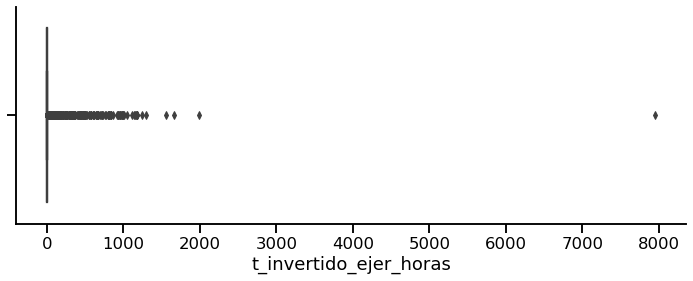

In [23]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_order['t_invertido_ejer_horas'])
seaborn.despine()

In [24]:
df_order = df_order[df_order['t_invertido_ejer_horas']<=1500]

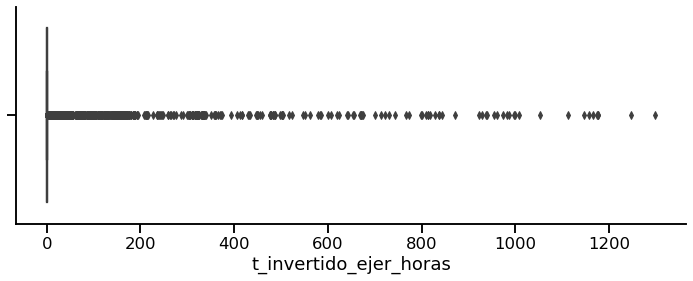

In [25]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_order['t_invertido_ejer_horas'])
seaborn.despine()

In [26]:
#plt.figure(figsize=(8, 8))
#ax=seaborn.histplot(df_order['t_invertido_ejer_dias'] , kde=True)

#ax.set_xlabel('Tiempo invertido entre envios en dias')
#ax.set_ylabel('Cant envios')
#ax.set_title('Tiempo invertido entre envios por dias', fontsize=20)

#plt.show()

**A continuacion se detecta el Tiempo entre ejercicio y ejercicio por estudiante (se toma el ultimo envio por estudiante, ejercicio)**

In [27]:
df_byExercise = df_mumuki.groupby(['student_uid','exercise_name'], as_index=False).agg({'submission_created_at':'max','id_exercise':'count'}).rename(columns={'submission_created_at':'f_ultimo_envio','id_exercise':'cant_envios'}).sort_values(by=['student_uid','f_ultimo_envio'],ascending = True)
df_byExercise['f_ultimo_envio_ant'] = df_byExercise['f_ultimo_envio'].shift().where(df_byExercise.student_uid.eq(df_byExercise.student_uid.shift()))

In [28]:
df_byExercise

,student_uid,exercise_name,f_ultimo_envio,cant_envios,f_ultimo_envio_ant
0,75,"Funciones, declaración / No tan distintos",2020-08-07 19:37:14.806,1,NaN
9,76,"Funciones, declaración / No tan distintos",2019-08-30 13:17:17.700,1,NaN
10,76,"Funciones, uso",2019-09-10 20:00:32.156,2,2019-08-30 13:17:17.700
13,76,Libros de la buena memoria,2019-09-10 20:09:15.049,2,2019-09-10 20:00:32.156
20,76,Tipos de datos / Datos de todo tipo,2019-09-10 20:14:34.695,4,2019-09-10 20:09:15.049
...,...,...,...,...,...
8876,361,¿Me conviene?,2019-10-17 12:52:42.552,1,NaN
8877,362,Triangulos,2019-10-17 14:36:54.224,3,NaN
8878,363,Cartelitos,2020-10-06 14:17:51.060,3,NaN
8880,363,Más Cartelitos,2020-10-06 14:27:26.752,4,2020-10-06 14:17:51.060


In [29]:
df_byExercise['t_inver_ejer'] = pd.to_datetime(df_byExercise['f_ultimo_envio'])-pd.to_datetime(df_byExercise['f_ultimo_envio_ant'])
df_byExercise['t_inver_ejer_horas'] = round((pd.to_datetime(df_byExercise['f_ultimo_envio'])-pd.to_datetime(df_byExercise['f_ultimo_envio_ant'])).dt.total_seconds() / 3600.0,2) 
df_byExercise['t_inver_ejer_dias'] = round(df_byExercise['t_inver_ejer_horas']/24,4)

In [30]:
df_byExercise.sort_values(by=['t_inver_ejer'],ascending = False)

,student_uid,exercise_name,f_ultimo_envio,cant_envios,f_ultimo_envio_ant,t_inver_ejer,t_inver_ejer_horas,t_inver_ejer_dias
388,97,Tipos de datos / Datos de todo tipo,2020-09-18 20:05:03.146,11,2019-10-23 11:49:33.276,331 days 08:15:29.870000,7952.26,331.3442
5145,250,"Funciones, declaración / No tan distintos",2020-10-12 17:17:17.822,6,2020-07-21 14:40:41.377,83 days 02:36:36.445000,1994.61,83.1088
8855,355,Conversiones,2020-08-03 19:40:07.416,1,2020-05-26 14:44:42.028,69 days 04:55:25.388000,1660.92,69.2050
5504,260,"Funciones, declaración / No tan distintos",2020-11-23 20:15:28.657,4,2020-09-19 17:00:28.418,65 days 03:15:00.239000,1563.25,65.1354
7771,319,"Funciones, uso",2020-11-21 15:17:26.661,35,2020-09-23 00:31:53.947,59 days 14:45:32.714000,1430.76,59.6150
...,...,...,...,...,...,...,...,...
8859,358,Operando strings,2020-05-16 18:50:49.407,6,NaN,NaT,NaN,NaN
8865,359,"Funciones, declaración / No tan distintos",2020-05-14 22:42:31.975,1,NaN,NaT,NaN,NaN
8876,361,¿Me conviene?,2019-10-17 12:52:42.552,1,NaN,NaT,NaN,NaN
8877,362,Triangulos,2019-10-17 14:36:54.224,3,NaN,NaT,NaN,NaN


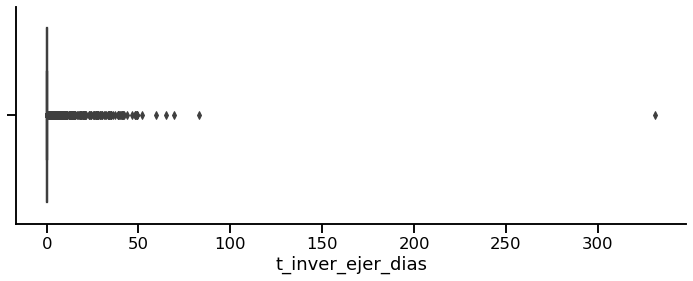

In [31]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_byExercise['t_inver_ejer_dias'])
seaborn.despine()

In [33]:
#mean_tiem_h = df_byExercise['t_inver_ejer_dias'].mean()
#median_tiem_h = df_byExercise['t_inver_ejer_dias'].median()
#std_tiem_h = df_byExercise['t_inver_ejer_dias'].std()

#plt.figure(figsize=(8, 8))
#ax=seaborn.histplot(df_byExercise['t_inver_ejer_dias'] , kde=True)

#ax.set_xlabel('Tiempo invertido')
#ax.set_ylabel('Ultimo envio x ejercicio x estudiante')
#ax.set_title('Tiempo invertido entre envio por ejercicio por estudiante', fontsize=20)
#ax.axvline(mean_tiem_h, color='r', linestyle='-',label='Mean')
#ax.axvline(median_tiem_h, color='g', linestyle='-',label='Median')
#ax.axvline(std_tiem_h, color='b', linestyle='-',label='Std')
#plt.legend(loc='upper right')

#plt.show()